In [1]:
"""This python script will analyze the world bank projects json file.
This program will find the top 10 countries with most projects, the top 10 major project themes, 
and fill in any missing data. Data can be retrieved again from http://search.worldbank.org/api/v2/projects"""

'This python script will analyze the world bank projects json file.\nThis program will find the top 10 countries with most projects, the top 10 major project themes, \nand fill in any missing data. Data can be retrieved again from http://search.worldbank.org/api/v2/projects'

In [2]:
# Import for the projectfrom matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from IPython.display import display, HTML
import re
from pandas.io.json import json_normalize
plt.style.use('fivethirtyeight')

In [3]:
# Example of data from the world bank api
num_rows = 2
skip_val = 0
url = f"http://search.worldbank.org/api/v2/projects?format=json&source=IBRD&rows={num_rows}&os={skip_val}&kw=N"
worldbankdf = pd.read_json(url,orient='series')
print(worldbankdf['projects'])
# Other parsing will be necessary but this is irrelevant because I will be using preprocessed data for this analysis
# also, the world bank api has a specific python module you can include

P159520    {'id': 'P159520', 'projectfinancialtype': 'OTH...
P161928    {'id': 'P161928', 'projectfinancialtype': 'IDA...
Name: projects, dtype: object


In [4]:
# Load the data for analysis
data = json.load((open('data/world_bank_projects.json')))
# Using json_normalize retrieve a pandas dataframe
df = json_normalize(data)
print(df.columns)

Index(['_id.$oid', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract.cdata', 'project_name',
       'projectdocs', 'projectfinancialtype', 'projectstatusdisplay',
       'regionname', 'sector', 'sector1.Name', 'sector1.Percent',
       'sector2.Name', 'sector2.Percent', 'sector3.Name', 'sector3.Percent',
       'sector4.Name', 'sector4.Percent', 'sector_namecode', 'sectorcode',
       'source', 'status', 'supplementprojectflg', 'theme1.Name',
       'theme1.Percent', 'theme_namecode', 'themecode', 'totalamt',
       'totalcommamt', 

In [5]:
# Isolate the useful columns into another dataframe
country_project_df = df[['id','countrycode','countryname','project_name','mjtheme_namecode', 'mjthemecode']]
print(display(country_project_df.head()))

,id,countrycode,countryname,project_name,mjtheme_namecode,mjthemecode
0,P129828,ET,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement...,"[{'code': '8', 'name': 'Human development'}, {...","8,11"
1,P144674,TN,Republic of Tunisia,TN: DTF Social Protection Reforms Support,"[{'code': '1', 'name': 'Economic management'},...","1,6"
2,P145310,TV,Tuvalu,Tuvalu Aviation Investment Project - Additiona...,"[{'code': '5', 'name': 'Trade and integration'...","5,2,11,6"
3,P144665,RY,Republic of Yemen,Gov't and Civil Society Organization Partnership,"[{'code': '7', 'name': 'Social dev/gender/incl...","7,7"
4,P144933,LS,Kingdom of Lesotho,Second Private Sector Competitiveness and Econ...,"[{'code': '5', 'name': 'Trade and integration'...","5,4"


None


In [6]:
# Check if any of the columns are missing data
print(country_project_df.info())
# Examine shape
print(country_project_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
id                  500 non-null object
countrycode         500 non-null object
countryname         500 non-null object
project_name        500 non-null object
mjtheme_namecode    500 non-null object
mjthemecode         500 non-null object
dtypes: object(6)
memory usage: 23.5+ KB
None
(500, 6)


In [7]:
# Find the top 10 countries with most projects
# Group the dataframe by their country code 
# and country name based off the count of the number of different projects for that country
count_df = country_project_df.groupby(['countrycode','countryname'])[['project_name']].count()
# To find the top 10 countries, sort them in descending order based off the count and then pop the country name index back out
count_df = count_df.sort_values(by='project_name',ascending=False).reset_index(level=1)
# For aesthetic purposes change the index names
count_df.columns = ['Country_Name','Number_Of_Projects']
count_df.index.name = 'Country_Code'
print(display(count_df.head(10)))

,Country_Name,Number_Of_Projects
Country_Code,,
ID,Republic of Indonesia,19
CN,People's Republic of China,19
VN,Socialist Republic of Vietnam,17
IN,Republic of India,16
RY,Republic of Yemen,13
MA,Kingdom of Morocco,12
BD,People's Republic of Bangladesh,12
NP,Nepal,12
3A,Africa,11


None


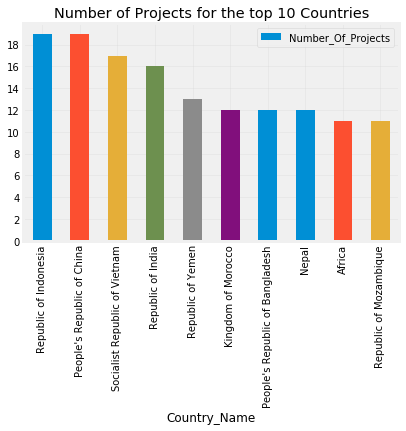

In [8]:
# 
count_df.iloc[0:10].plot.bar(x='Country_Name',y='Number_Of_Projects',rot=90)
plt.title("Number of Projects for the top 10 Countries")
plt.grid(True,alpha=0.2)
plt.yticks(range(0, 20, 2))
plt.show()

In [9]:
# Figure out the type of Country_Code used to determine if Taiwan is considered a country in this dataset
print(count_df.index.str.len().max())
# A 2 length country code uses the ISO 3166-1 alpha-2 standard
# Use the two letter code for Taiwan (TW) and see if a row exists
tw = count_df.get('TW',"No TW country code.")
print(tw)

2
No TW country code.


In [10]:
# After going over each row, there doesn't seem to be any development in Taiwan
# thus there is no need to continue, otherwise figure out if we should seperate them
pd.set_option('max_colwidth',400)

print(display(HTML(country_project_df[country_project_df.countrycode == 'CN'][['project_name']].to_html())))

,project_name
7,China Renewable Energy Scale-Up Program Phase II
119,China: Guangdong Social Security Integration and Rural Worker Training
120,Anhui Xuancheng Infrastructure for Industry Relocation
121,China: Nanchang Urban Rail Project
156,Ma'anshan Cihu River Basin Improvement Project
162,Ningbo Municipal Solid Waste Minimization and Recycling Project
164,Guangxi Laibin Water Environment Project
200,China: Jiangxi Shangrao Sanqingshan Airport Project
226,Urban Scale Building Energy Efficiency and Renewable Energy
250,China GEF Large City Congestion and Carbon Reduction Project


None


In [11]:
# Find the most popular project themes based off of the mjtheme_namecode column
parsednamecol = country_project_df.mjtheme_namecode.apply(lambda r : ",".join(re.findall("\d{1,2}",str(r)))).astype(str)
pop_mjtheme_namecode = pd.Series(parsednamecol.str.cat(sep=',').split(',')).value_counts()
pop_mjtheme_namecode.index = [int(i) for i in pop_mjtheme_namecode.index]
pop_mjtheme_namecode = pop_mjtheme_namecode.sort_values(ascending=False)
pop_mjtheme_namecode.name = 'Count'
pop_mjtheme_namecode = pd.DataFrame(pop_mjtheme_namecode)
pop_mjtheme_namecode.index.name = "Project Theme Code"
print(display(pop_mjtheme_namecode.transpose()))


#Do the same using the mjthemecode column to ensure the correctness of the mjtheme_namecode column
pop_mjthemecode = pd.Series(country_project_df.mjthemecode.str.cat(sep=',').split(',')).value_counts()
pop_mjthemecode.index = [int(i) for i in pop_mjthemecode.index]
pop_mjthemecode = pop_mjthemecode.sort_values(ascending=False)
pop_mjthemecode.name = 'Count'
pop_mjthemecode = pd.DataFrame(pop_mjthemecode)
pop_mjthemecode.index.name = "Project Theme Code"
print(display(pop_mjthemecode.transpose()))

#Compare the two and make sure the data is properly filled out
print(pop_mjtheme_namecode.equals(pop_mjthemecode))

Project Theme Code,11,10,8,2,6,4,7,5,9,1,3
Count,250,216,210,199,168,146,130,77,50,38,15


None


Project Theme Code,11,10,8,2,6,4,7,5,9,1,3
Count,250,216,210,199,168,146,130,77,50,38,15


None
True


In [12]:
# Since we are overwriting the entire column, we are expecting to get a warning for it
pd.options.mode.chained_assignment = None
PROJECT_CODE_NAME = {'1': 'Economic management',
                     '2': 'Public sector governance',
                     '3': 'Rule of law',
                     '4': 'Financial and private sector development',
                     '5': 'Trade and integration',
                     '6': 'Social protection and risk management',
                     '7': 'Social dev/gender/inclusion',
                     '8': 'Human development',
                     '9': 'Urban development',
                     '10': 'Rural development',
                     '11': 'Environment and natural resources management',
                     }

def reapply_namecode(row):
    '''This function will apply the method '''
    name = [{'code': entry, 'name': PROJECT_CODE_NAME[entry.replace(
        '\'', '')]} for entry in re.findall("'\d{1,2}'", str(row))]
    return name

# This will apply the row changes 
country_project_df['mjtheme_namecode'] = country_project_df.loc[:,
                                                                'mjtheme_namecode'].apply(reapply_namecode)

print(display(country_project_df.head(10)))

,id,countrycode,countryname,project_name,mjtheme_namecode,mjthemecode
0,P129828,ET,Federal Democratic Republic of Ethiopia,Ethiopia General Education Quality Improvement Project II,"[{'code': ''8'', 'name': 'Human development'}, {'code': ''11'', 'name': 'Environment and natural resources management'}]","8,11"
1,P144674,TN,Republic of Tunisia,TN: DTF Social Protection Reforms Support,"[{'code': ''1'', 'name': 'Economic management'}, {'code': ''6'', 'name': 'Social protection and risk management'}]","1,6"
2,P145310,TV,Tuvalu,Tuvalu Aviation Investment Project - Additional Financing,"[{'code': ''5'', 'name': 'Trade and integration'}, {'code': ''2'', 'name': 'Public sector governance'}, {'code': ''11'', 'name': 'Environment and natural resources management'}, {'code': ''6'', 'name': 'Social protection and risk management'}]","5,2,11,6"
3,P144665,RY,Republic of Yemen,Gov't and Civil Society Organization Partnership,"[{'code': ''7'', 'name': 'Social dev/gender/inclusion'}, {'code': ''7'', 'name': 'Social dev/gender/inclusion'}]","7,7"
4,P144933,LS,Kingdom of Lesotho,Second Private Sector Competitiveness and Economic Diversification Prj,"[{'code': ''5'', 'name': 'Trade and integration'}, {'code': ''4'', 'name': 'Financial and private sector development'}]","5,4"
5,P146161,KE,Republic of Kenya,Additional Financing for Cash Transfers for Orphans and Vulnerable Children,"[{'code': ''6'', 'name': 'Social protection and risk management'}, {'code': ''6'', 'name': 'Social protection and risk management'}]","6,6"
6,P121185,IN,Republic of India,National Highways Interconnectivity Improvement Project,"[{'code': ''2'', 'name': 'Public sector governance'}, {'code': ''4'', 'name': 'Financial and private sector development'}]","2,4"
7,P127033,CN,People's Republic of China,China Renewable Energy Scale-Up Program Phase II,"[{'code': ''11'', 'name': 'Environment and natural resources management'}, {'code': ''8'', 'name': 'Human development'}]","11,8"
8,P130164,IN,Republic of India,Rajasthan Road Sector Modernization Project,"[{'code': ''10'', 'name': 'Rural development'}, {'code': ''7'', 'name': 'Social dev/gender/inclusion'}]","10,7"
9,P130903,MA,Kingdom of Morocco,MA Accountability and Transparency DPL,"[{'code': ''2'', 'name': 'Public sector governance'}, {'code': ''2'', 'name': 'Public sector governance'}, {'code': ''2'', 'name': 'Public sector governance'}]","2,2,2"


None
